# Arch packages survey analysis

What follows is a short analysis of the data gathered through the [Arch packages survey](https://goo.gl/forms/y471TrkSofkByoJA3) I ran a few weeks back. It gathered approximately 70 responses (a nice number, but some stats are stretched a bit thin - if you haven't filled in the survey and would like to, please do!). Unfortunately due to some stats having so few data points, some results probably aren't very indicative of reality... :/ Nevermind, let's have fun checking out the results anyway!

This document was written in Jupyter notebook. Whether you're reading this on my blog as a static page, or in a Jupyter notebook viewer, the ipynb source and csv data file from the survey can be found [on GitHub](https://github.com/swalladge/notebooks). Finally, this is my first experiment with Jupyter and pandas; feedback, comments, and bug reports welcome!

Anyway, without further ago, let's load the data:

In [1]:
%matplotlib inline

import math
import pandas as pd
import matplotlib.pyplot as plt


# pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

df = pd.read_csv('data/arch-survey-responses.csv')
df.columns = ['stamp', 'packs', 'use', 'time', 'de', 'disk']

# quick inspection
df[:3]

,stamp,packs,use,time,de,disk
0,2018/06/23 12:03:26 am GMT+9:30,1599,School/homework,1 year,KDE Plasma,NaN
1,2018/06/23 12:10:37 am GMT+9:30,861,All of the above,2 months,Xmonad,NaN
2,2018/06/23 12:16:30 am GMT+9:30,2176,Programming,3 years,i3,16628.0


Ok, data loaded! Let's run through some overall stats:

In [2]:
mean_packages = int(round(df['packs'].mean()))
print('Average number of packages installed: {}'.format(mean_packages))

Average number of packages installed: 1112


In [3]:
time_installed_series = df['time']

conversions = {'1 month': 1,
 '1 year': 12,
 '2 months': 2,
 '2 years': 24,
 '3 months': 3,
 '3 years': 36,
 '5 months': 5,
 '5 years': 60,
 '8 months': 8,
 '8 years': 96,
 'when Arch was first released in 2002': 196}

time_installed_converted = pd.Series(map(lambda s:conversions[s], filter(lambda t: type(t) == str, time_installed_series)))
time_installed = int(round(time_installed_converted.mean()))
print('Average time system installed was {} months.'.format(time_installed))

time_installed_series.value_counts()

Average time system installed was 18 months.


1 year      21
2 years     10
3 years      9
1 month      8
2 months     6
3 months     5
8 months     3
5 months     2
8 years      2
5 years      2
Name: time, dtype: int64

So is there a correlation between time since the system was installed and the number of packages installed?

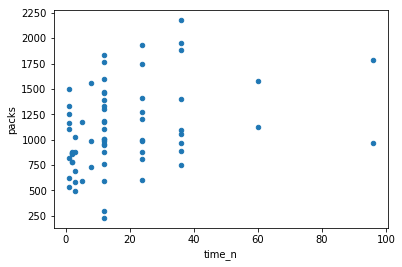

In [4]:
df['time_n'] = df.apply(lambda row: conversions.get(row['time']), axis=1)

df.plot.scatter(x='time_n', y='packs')

So this doesn't seem to show much... apart from the fact that there is a lot of variation and not much data for older installs.

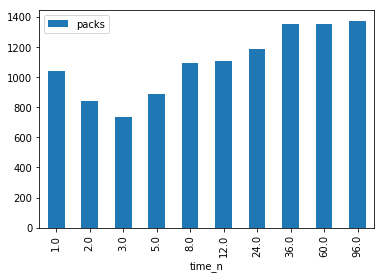

In [5]:
frame = df[['packs', 'time_n']].groupby(['time_n']).mean()
frame.plot(kind='bar')

Ah now this is interesting. The general trend line in this case seems to start at an average of 1000 packages installed when the system is around a month old. It gradually decreases for a few months, before steadily increasing over the next few years, before remaining relatively steady. There isn't much data to go by for the points greater than 3 years, so take with a pinch of salt. Also note that the scale isn't linear...

My theory with this is that an Arch user goes through several stages:

1. new install: test out all the things!! (high number of packages)
2. settling in: removing unnecessary packages and keeping the system tidy in general (decrease in packages)
3. serious use: the system gradually is used for more things over time, and the packages build up. (steady increase)
4. home sweet home: everything you'll ever need is installed. Yes there's some cruft, but why bother tidying up since it all just works?

¯\\\_(ツ)\_/¯


---

Now let's see the average number of packages installed split by type of use the machine sees:

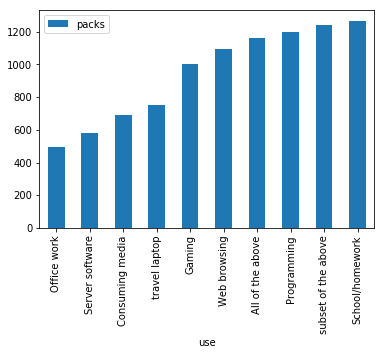

In [12]:
df[['packs', 'use']].groupby('use').mean().sort_values(by='packs').plot(kind='bar')

It should be noted that "Office work" and "travel laptop" had one response each; they were entered manually under the 'other' category. Some other responses were normalized under 'subset of the above'. 

3 respondants entered "Server software", and (unsurprisingly) these machines averaged the lowest package count. Interestingly, "School/homework" had the largest number of packages. Maybe due to requiring extra miscellanious software?

Next, let's view the package count by desktop environment:

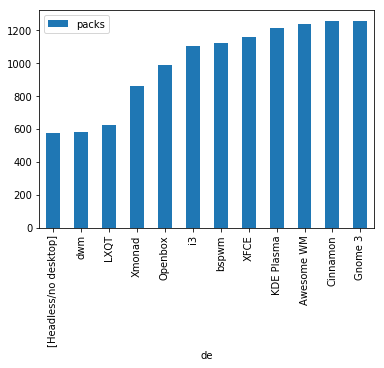

In [7]:
df[['packs', 'de']].groupby('de').mean().sort_values(by='packs').plot(kind='bar')

Now this is a trend that neatly fits general perception of the "weight" of a system. Headless or terminal-only systems had the least packages. Full desktop environments had the most packages. Finally, machines with "lighter" DEs and window managers sat in the middle of the package count. Interestingly, Awesome WM users had a larger number of packages on average than other light WM/DE users.


I've run out of ideas for other possible graphs to do. Suggestions welcome! ;) As previously said, the csv data file of responses is available in the [git repository on GitHub](https://github.com/swalladge/notebooks).

Hope this was interesting! I enjoying experimenting with some data and learning Jupyter notebook and pandas anyway. :)

As always, feel free to leave comments on my blog, ping me on Twitter ([@srwalladge](https://twitter.com/srwalladge), or [contact me by another means](https://swalladge.id.au/contact/).